### 2 - PRE - PROCESSAMENTO - BAG OF WORDS, VETORIZAÇÃO E SELEÇÃO DE CARACTERÍSTICAS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
# CARREGANDO ARQUIVO
df_content_ternario = pd.read_csv('df-content-ternario.csv')

####  BAG OF WORDS E VETORIZAÇÃO: TFIDF

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from joblib import dump, load

In [5]:
# CARREGANDO O MODELO COUNT VECTORIZER 
count_vectorizer = load('count-vectorizer-ter.pkl')

In [6]:
variaveis = count_vectorizer.get_feature_names()

In [7]:
vocabulario = count_vectorizer.vocabulary_

### 3 - SELEÇÃO DE VARIÁVEIS

Etapa de seleção de variáveis realizada no pré-processamento parte 3 CV.

### 4 - DADOS DE TREINO E TESTE

In [8]:
import numpy as np

In [9]:
# CARREGANDO DADOS DE TREINO E TESTE
xtreino = pd.read_csv('xtreino-ter.csv')
xteste = pd.read_csv('xteste-ter.csv') 
ytreino = pd.read_csv('ytreino-ter.csv') 
yteste = pd.read_csv('yteste-ter.csv') 

In [10]:
ytreino = np.ravel(ytreino)
yteste = np.ravel(yteste)

In [11]:
# APLICANDO O COUNT VECTORIZED
xtreino = count_vectorizer.transform(xtreino.passo6)
xteste = count_vectorizer.transform(xteste.passo6)

In [12]:
# CRIANDO UM MODELO TFIDF E O APLICANDO AOS DADOS DE TREINO E TESTE
tfidf_vectorizer = TfidfTransformer()

xtreino = tfidf_vectorizer.fit_transform(xtreino)
xteste = tfidf_vectorizer.transform(xteste)

In [13]:
# SALVAR MODELO
dump(tfidf_vectorizer, 'tfidf-vectorizer-ter.pkl')

['tfidf_vectorizer_ter.pkl']

### 5 - APRENDIZADO

In [14]:
import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

#### DECISION TREE

In [ ]:
# TREINO
inicio = time.time()
dtree = DecisionTreeClassifier()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid1 = {"criterion": ["gini","entropy"],
               "random_state": [1]}

# GRID SEARCH
grid1 = GridSearchCV(estimator = dtree, 
                     param_grid = param_grid1, 
                     scoring = 'accuracy',
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)

dtreeTFIDF = grid1.fit(xtreino, ytreino)

ac1 = dtreeTFIDF.best_score_
print(f"Acurácia: {round(ac1*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", dtreeTFIDF.best_params_)

In [15]:
# CARREGAR MODELO
dtreeTFIDF = load('dtreeTFIDF-ter.pkl')

In [16]:
dtreeTFIDF.best_params_

{'criterion': 'gini', 'random_state': 1}

Acurácia Teste Decision Tree Unigrama-TFIDF: 64.91%
Tempo de teste: 0.01 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.74      0.82      0.78     31515
    negativo       0.66      0.65      0.65     31880
      neutro       0.53      0.48      0.50     31679

    accuracy                           0.65     95074
   macro avg       0.64      0.65      0.64     95074
weighted avg       0.64      0.65      0.64     95074



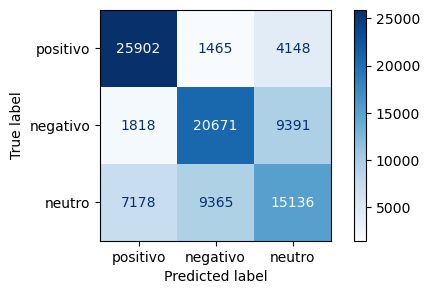

In [17]:
# TESTE
inicio = time.time()
prev_dtreeTFIDF = dtreeTFIDF.predict(xteste)
ac_dtreeTFIDF = accuracy_score(prev_dtreeTFIDF, yteste)
print(f"Acurácia Teste Decision Tree Unigrama-TFIDF: {round(ac_dtreeTFIDF*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste, prev_dtreeTFIDF, labels = ["positivo", "negativo", "neutro"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(dtreeTFIDF, xteste, yteste, labels = ["positivo", "negativo", "neutro"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm-dtreeTFIDF-ter.png', format ='png', bbox_inches = 'tight')
plt.show()

In [18]:
# SALVAR MODELO
dump(dtreeTFIDF, "dtreeTFIDF-ter.pkl")

['dtreeTFIDF_ter.pkl']

#### K-NEAREST NEIGHBOR

In [ ]:
# TREINO
inicio = time.time()
knn = KNeighborsClassifier()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid2 = {"n_neighbors": [5,9,15,25,35],
               "weights": ["uniform"],
               "algorithm": ["auto"],
               "leaf_size": [30],
               "p": [2],
               "metric": ["minkowski"]}

# GRID SEARCH
grid2 = GridSearchCV(estimator = knn, 
                     param_grid = param_grid2, 
                     scoring = 'accuracy',
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)

knnTFIDF = grid2.fit(xtreino, ytreino)

ac2 = knnTFIDF.best_score_
print(f"Acurácia: {round(ac2*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", knnTFIDF.best_params_)

In [19]:
# CARREGAR MODELO
knnTFIDF = load('knnTFIDF-ter.pkl')

In [20]:
knnTFIDF.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Acurácia Teste KNN Unigrama-TFIDF: 56.72%
Tempo de teste: 12.03 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.60      0.82      0.69     31515
    negativo       0.58      0.48      0.53     31880
      neutro       0.50      0.40      0.44     31679

    accuracy                           0.57     95074
   macro avg       0.56      0.57      0.55     95074
weighted avg       0.56      0.57      0.55     95074



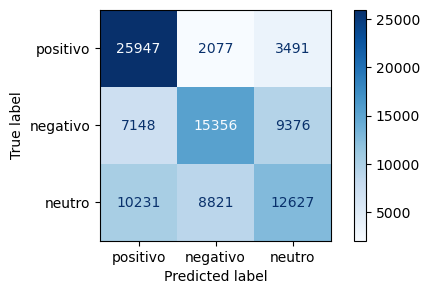

In [21]:
# TESTE
inicio = time.time()
prev_knnTFIDF = knnTFIDF.predict(xteste)
ac_knnTFIDF = accuracy_score(prev_knnTFIDF, yteste)
print(f"Acurácia Teste KNN Unigrama-TFIDF: {round(ac_knnTFIDF*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste, prev_knnTFIDF, labels = ["positivo", "negativo", "neutro"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(knnTFIDF, xteste, yteste, labels = ["positivo", "negativo", "neutro"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm-knnTFIDF-ter.png', format ='png', bbox_inches = 'tight')
plt.show()

In [22]:
# SALVAR MODELO
dump(knnTFIDF, "knnTFIDF-ter.pkl")

['knnTFIDF_ter.pkl']

#### NAIVE BAYES

In [ ]:
# TREINO
inicio = time.time()
nb = MultinomialNB()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid3 = {"alpha": [1.0],
               "fit_prior": [True],
               "class_prior": [None]}

# GRID SEARCH
grid3 = GridSearchCV(estimator = nb,
                     param_grid = param_grid3,
                     scoring = 'accuracy',
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)

nbTFIDF = grid3.fit(xtreino, ytreino)


ac3 = nbTFIDF.best_score_
print(f"Acurácia: {round(ac3*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", nbTFIDF.best_params_)

In [23]:
# CARREGAR MODELO
nbTFIDF = load('nbTFIDF-ter.pkl')

Acurácia Teste Naive Bayes Unigrama-TFIDF: 70.78%
Tempo de teste: 0.0 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.80      0.84      0.82     31515
    negativo       0.69      0.75      0.72     31880
      neutro       0.61      0.53      0.57     31679

    accuracy                           0.71     95074
   macro avg       0.70      0.71      0.70     95074
weighted avg       0.70      0.71      0.70     95074



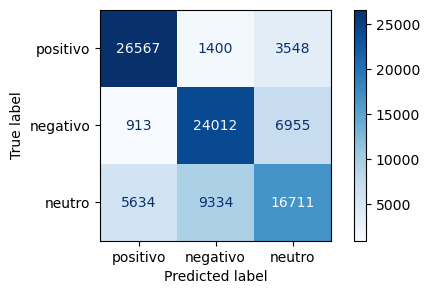

In [24]:
# TESTE
inicio = time.time()
prev_nbTFIDF = nbTFIDF.predict(xteste)
ac_nbTFIDF = accuracy_score(prev_nbTFIDF, yteste)
print(f"Acurácia Teste Naive Bayes Unigrama-TFIDF: {round(ac_nbTFIDF*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste, prev_nbTFIDF, labels = ["positivo", "negativo", "neutro"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(nbTFIDF, xteste, yteste, labels = ["positivo", "negativo", "neutro"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm-nbTFIDF-ter.png', format ='png', bbox_inches = 'tight')
plt.show()

In [25]:
# SALVAR MODELO
dump(nbTFIDF, 'nbTFIDF-ter.pkl')

['nbTFIDF_ter.pkl']

#### XTREME GRADIENT BOOSTING

In [26]:
# FUNÇÃO PARA TRANSFORMAÇÃO DAS CLASSES
def TransformaClasse(array):
    
    for i in range(len(array)):
        if array[i] == "negativo":
            array[i] = 1
        elif array[i] == "positivo":
            array[i] = 0
        else:
            array[i] = 2
    return(array)

In [27]:
ytreino_transf = TransformaClasse(ytreino)
ytreino_xgb = [value for value in ytreino_transf]

In [28]:
yteste_transf = TransformaClasse(yteste)
yteste_xgb = [value for value in yteste_transf]

In [ ]:
# TREINO
inicio = time.time()
xgb_cl = XGBClassifier()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid5 = {"n_estimators": [100,300,700,1000,1100],
               "learning_rate": [0.01,0.2,0.3],
               "gamma": [0.2],
               "max_depth": [6],
               "subsample": [0.7],      
               "colsample_bytree": [0.7],
               "reg_alpha": [0.05],
               "objective": ["multi:softmax"]}

# GRID SEARCH
grid5 = GridSearchCV(estimator = xgb_cl, 
                     param_grid = param_grid5, 
                     scoring = "accuracy",
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)


xgbTFIDF = grid5.fit(xtreino, ytreino_xgb)

ac5 = xgbTFIDF.best_score_
print(f"Acurácia: {round(ac5*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", xgbTFIDF.best_params_)

In [29]:
# CARREGAR MODELO
xgbTFIDF = load('xgbTFIDF-ter.pkl')

In [30]:
xgbTFIDF.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 1000,
 'objective': 'multi:softmax',
 'reg_alpha': 0.05,
 'subsample': 0.7}

Acurácia Teste XGBoost Unigrama-TFIDF: 72.8%
Tempo de teste: 0.33 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.81      0.87      0.84     31515
    negativo       0.73      0.75      0.74     31880
      neutro       0.63      0.57      0.60     31679

    accuracy                           0.73     95074
   macro avg       0.72      0.73      0.72     95074
weighted avg       0.72      0.73      0.72     95074



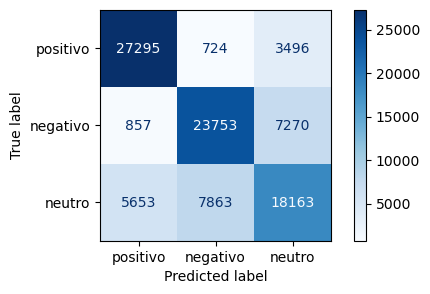

In [31]:
inicio = time.time()
prev_xgbTFIDF = xgbTFIDF.predict(xteste)
ac_xgbTFIDF = accuracy_score(yteste_xgb, prev_xgbTFIDF)
print(f"Acurácia Teste XGBoost Unigrama-TFIDF: {round(ac_xgbTFIDF*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste_xgb, prev_xgbTFIDF,target_names = ["positivo", "negativo", "neutro"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(xgbTFIDF, xteste, yteste_xgb, display_labels = ["positivo", "negativo", "neutro"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm-xgbTFIDF-ter.png', format ='png', bbox_inches = 'tight')
plt.show()

In [32]:
# SALVAR MODELO
dump(xgbTFIDF, "xgbTFIDF-ter.pkl")

['xgbTFIDF_ter.pkl']